## We want to test different parameters for t-SNE on MNIST 
- perplexity 
- EE stopping iteration 
- total iterations 
- learning step size 
- EE factor
- different random state
- different data set sizes

### loading data etc. 

In [3]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np 
from openTSNE import TSNE


import openTSNE
print('openTSNE', openTSNE.__version__)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# preprocessing MNIST data 
X = np.zeros((x_train.shape[0], 784))
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)

# shuffle dataset and take random 20% for visualisation with tSNE 
X_sample = X.sample(frac=0.2, random_state=12).reset_index(drop=True)
Y_sample = Y.sample(frac=0.2, random_state=12).reset_index(drop=True)
X_sample['label'] = Y_sample

openTSNE 1.0.2


In [2]:
from openTSNE import callbacks
# Define a custom callback to record KL divergence
class KLTracker(callbacks.Callback):
    def __init__(self, record_every=10):
        self.kl_divergences = []
        self.record_every = record_every

    def __call__(self, iteration, error, embedding):
        # Record KL divergence at the specified interval
        if iteration % self.record_every == 0:
            self.kl_divergences.append((iteration, error))
        return False 

### perplexity

In [5]:

perplexity_values = [1, 5, 10, 30, 60, 100]
perp_kl_trackers = [KLTracker(record_every=10) for i in range(6)]
tsne_versions = [TSNE(perplexity=perp, random_state=12, callbacks=kl_tracker, verbose=True) for perp, kl_tracker in zip(perplexity_values, perp_kl_trackers)] 
tsne_outputs = [version.fit(X_sample.to_numpy()) for version in tsne_versions]


--------------------------------------------------------------------------------
TSNE(callbacks=<__main__.KLTracker object at 0x13fe19100>,
     early_exaggeration=12, perplexity=1, random_state=12, verbose=True)
--------------------------------------------------------------------------------
===> Finding 3 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 20.60 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.05 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.37 seconds
===> Running optimization with exaggeration=12.00, lr=1000.00 for 250 iterations...
Iteration   50, KL divergence 6.7725, 50 iterations in 1.3793 sec
Iteration  100, KL divergence 6.0241, 50 iterations in 1.3513 sec
Iteration  150, KL divergence 5.6588, 50 iterations in 1.3356 sec
Iteration  200, KL divergence 5.4263, 50 iterations in 1.3068 sec
Iteration  250, KL divergence 5.2581, 50 iterations in 1.3879 sec
   --> Time elap

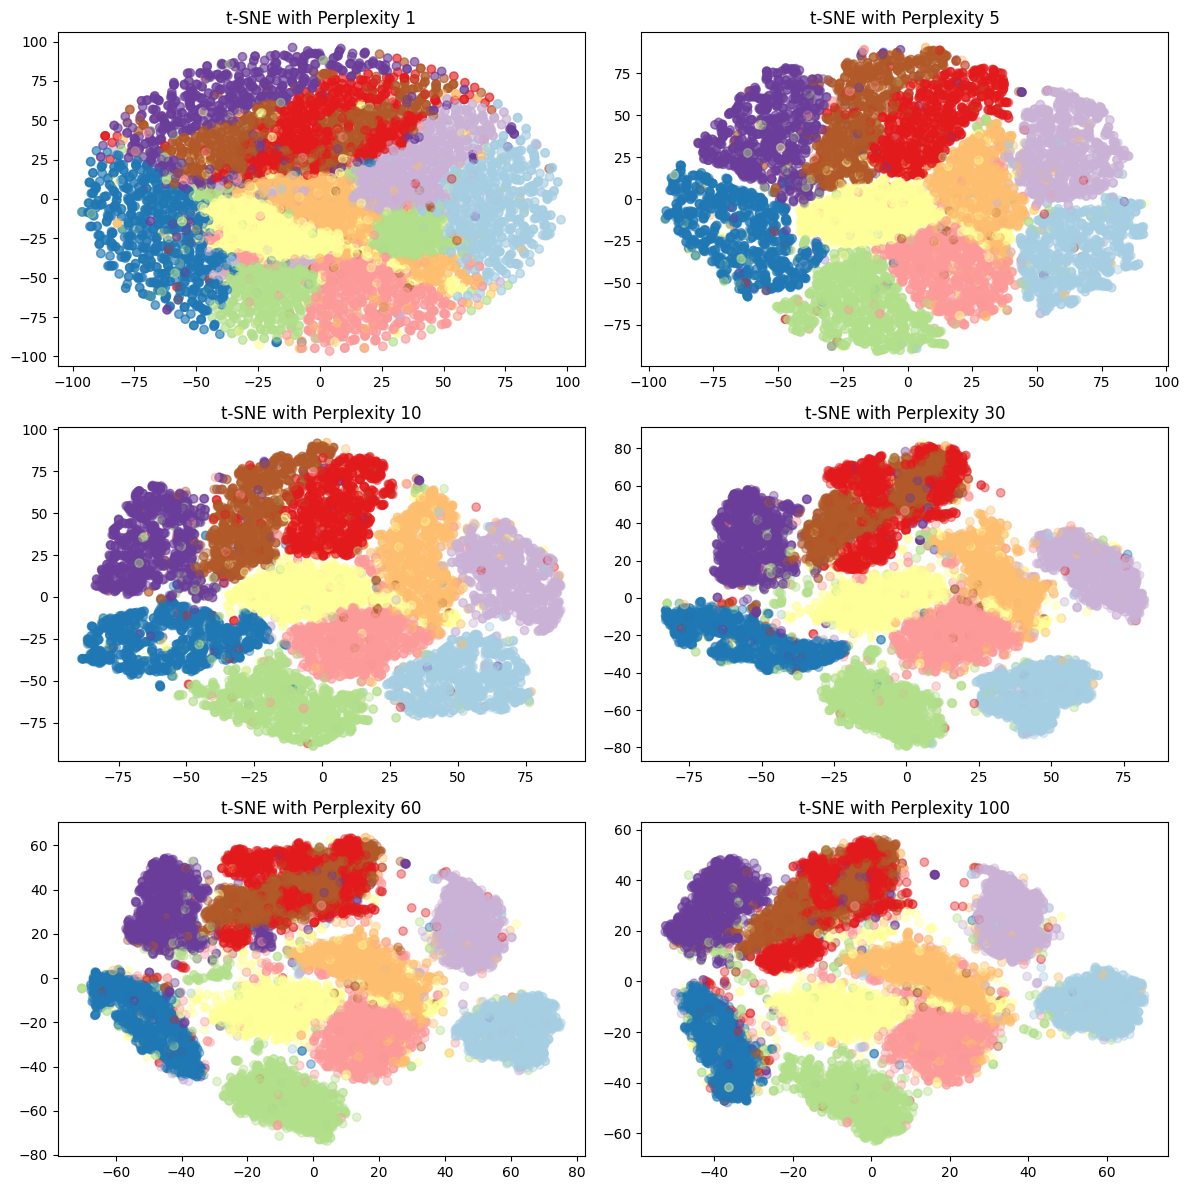

In [6]:
# plotting in a grid 
# Create a 3x2 grid for scatter plots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the embeddings and corresponding axes
for i, (ax, embedding, perplexity) in enumerate(zip(axes, tsne_outputs, perplexity_values)):
    ax.scatter(
        x=embedding[:, 0], 
        y=embedding[:, 1], 
        c=X_sample['label'], 
        cmap=plt.colormaps.get_cmap('Paired'), 
        alpha=0.4
    )
    ax.set_title(f't-SNE with Perplexity {perplexity}')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

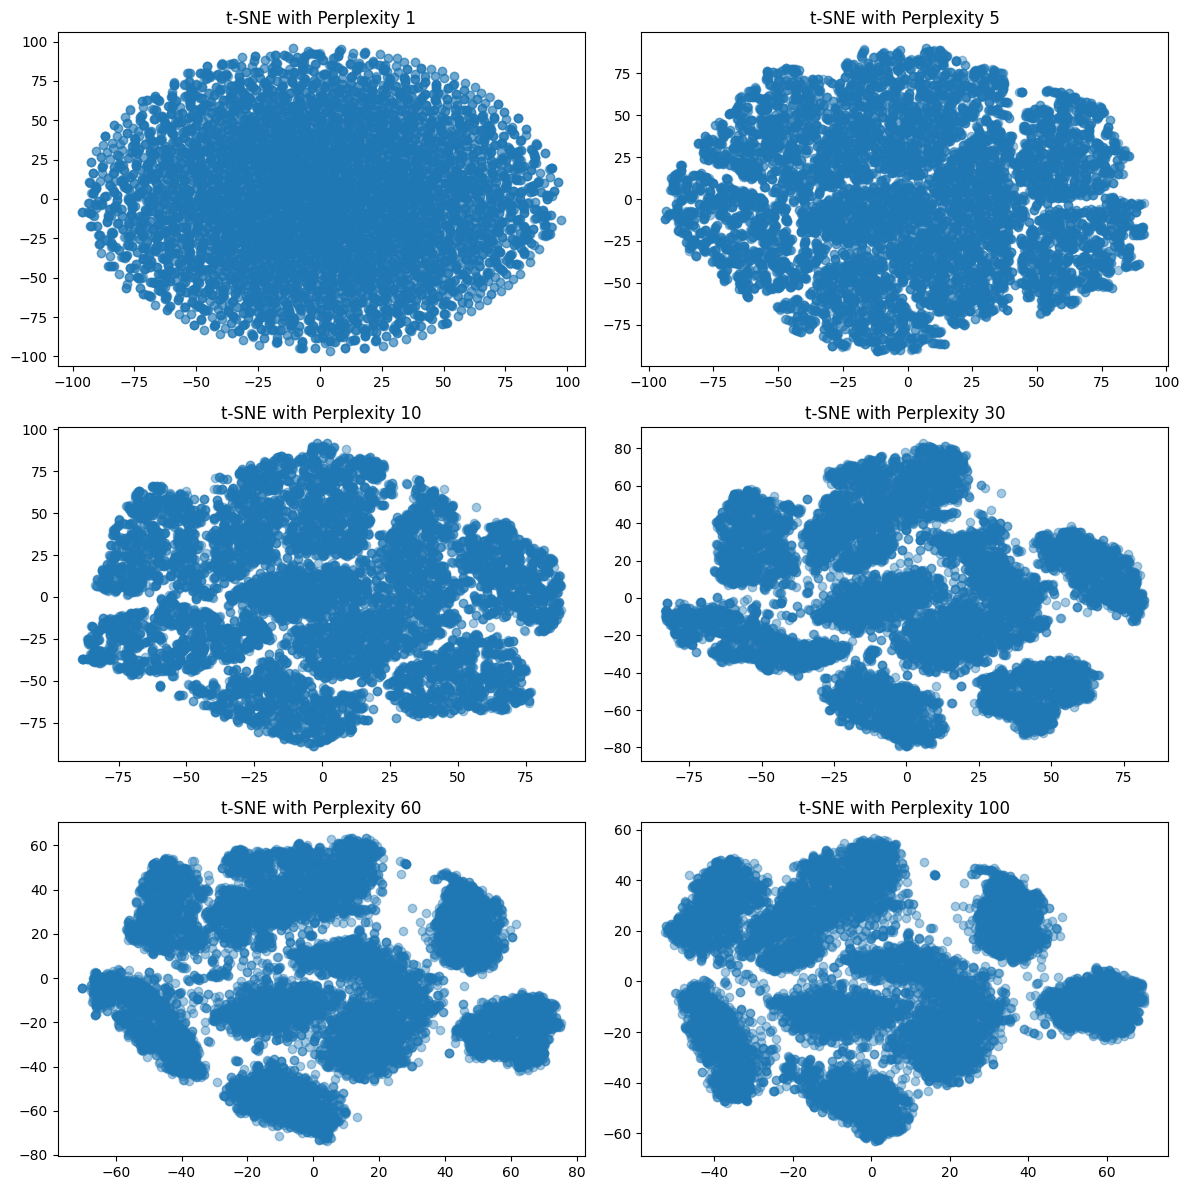

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the embeddings and corresponding axes
for i, (ax, embedding, perplexity) in enumerate(zip(axes, tsne_outputs, perplexity_values)):
    ax.scatter(
        x=embedding[:, 0], 
        y=embedding[:, 1], 
        alpha=0.4
    )
    ax.set_title(f't-SNE with Perplexity {perplexity}')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [12]:
perp_klds = [perp_kl_trackers[i].kl_divergences for i in range(6)]
perp_klds

[[(50, 6.772451703393363),
  (100, 6.024097860329398),
  (150, 5.658834456463854),
  (200, 5.426339147418284),
  (250, 5.258091876164871),
  (50, 3.815656680367768),
  (100, 3.3306398113797417),
  (150, 3.048485031208317),
  (200, 2.8544702414333543),
  (250, 2.70645153979439),
  (300, 2.58811540313045),
  (350, 2.4920134718391544),
  (400, 2.409561349695121),
  (450, 2.3385109042414527),
  (500, 2.276845335972924)],
 [(50, 5.9406576055555895),
  (100, 5.614811002215063),
  (150, 5.487371253789982),
  (200, 5.433233477100302),
  (250, 5.405210231506173),
  (50, 3.27861336924388),
  (100, 2.905044868111702),
  (150, 2.7043261890908408),
  (200, 2.5711643421524624),
  (250, 2.4724582995716027),
  (300, 2.3958101660496673),
  (350, 2.3341763635471153),
  (400, 2.2835628095564093),
  (450, 2.239924314920957),
  (500, 2.2024486098301743)],
 [(50, 5.4340165163832115),
  (100, 5.305342126085929),
  (150, 5.2763026676268385),
  (200, 5.264565356158554),
  (250, 5.2584615364808815),
  (50, 2.92

In [ ]:
iter_and_error_list = [zip(*(perp_kl_trackers[i].kl_divergences)) for i in range(6)]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the KL divergence data and corresponding axes
for i, (ax, iterations, errors, perplexity) in enumerate(zip(axes, iterations_list, kl_errors_list, perplexity_values)):
    ax.plot(
        iterations, errors, marker='o', linestyle='-', color='b', label=f'Perplexity {perplexity}'
    )
    ax.set_title(f'KL Divergence of t-SNE with Perplexity {perplexity}', fontsize=10)
    ax.set_xlabel("Iteration", fontsize=8)
    ax.set_ylabel("KL Divergence", fontsize=8)
    ax.grid(True)
    ax.legend(fontsize=8)

# Adjust layout for better readability
plt.tight_layout()
plt.show()